In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement

In [4]:
url = 'https://raw.githubusercontent.com/raminstad/Tools1_Final/main/final_df.csv'
df = pd.read_csv(url, index_col=0)


#convert year|month|day to float type. Columns contain string, int, and Nan
for i in range(0,3):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')


#drop all rows with Nan values in year|month|day
#convert to int type for analysis
for c in range(0,3):
    col = df.columns[c]
    for i in range(0,len(df)):
        if pd.isnull(df.loc[i][col]):
            df.drop(i, inplace=True)
    df.reset_index(inplace=True, drop = True)
    df[col] = df[col].astype(int)





In [5]:
df.describe(include = 'all')

,YEAR,MONTH,DAY,BAROMETER,THERMOMETER,LATITUDE,LONGITUDE
count,91272.000000,91272.000000,91272.000000,68478.000000,78394.000000,7060.000000,7212.000000
mean,1845.468424,6.526295,15.683430,29.668393,19.206488,0.438899,-4.707345
std,14.485907,3.347501,8.795111,2.031141,8.459335,37.880266,75.727162
min,1803.000000,1.000000,1.000000,3.080000,-35.000000,-67.380000,-357.490000
25%,1844.000000,4.000000,8.000000,29.720000,12.222222,-35.500000,-44.015000
50%,1846.000000,6.000000,16.000000,29.960000,20.000000,0.000000,-1.440000
75%,1850.000000,9.000000,23.000000,30.100000,26.666667,26.087500,41.292500
max,1984.000000,12.000000,31.000000,81.500000,65.000000,75.560000,179.540000


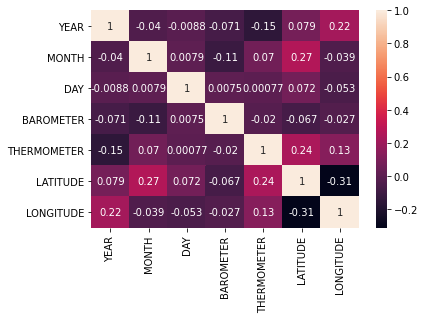

In [6]:
corrMatrix = df.dropna(how='all').corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [7]:
#pivot table with buckets
lat = pd.cut(df['LATITUDE'],8)
dfPivot = df.pivot_table('THERMOMETER',index = ['YEAR', 'MONTH'], columns = lat)
dfStdDiv = df.groupby(by=['YEAR']).std()


In [8]:
dfPivot

LATITUDE    (-67.523, -49.512]  (-49.512, -31.645]  (-31.645, -13.777]  \
YEAR MONTH                                                               
1804 3                     NaN                 NaN                 NaN   
     4                     NaN                 NaN           26.562500   
     5                     NaN           18.888889           19.722222   
     6                     NaN                 NaN           20.972222   
     7                     NaN                 NaN                 NaN   
...                        ...                 ...                 ...   
1896 1                     NaN                 NaN                 NaN   
     2                     NaN                 NaN                 NaN   
     3                     NaN                 NaN                 NaN   
     4                     NaN                 NaN                 NaN   
     5                     NaN                 NaN                 NaN   

LATITUDE    (-13.777, 4.09]  (4.09, 21.958]  (21.958, 39.825]  \
YEAR MONTH                                                      
1804 3                  NaN       30.046296               NaN   
     4            29.722222             NaN               NaN   
     5                  NaN             NaN               NaN   
     6                  NaN             NaN               NaN   
     7                  NaN             NaN         25.347222   
...                     ...             ...               ...   
1896 1                  NaN             NaN         23.828571   
     2                  NaN             NaN         22.912500   
     3                  NaN             NaN         22.060000   
     4                  NaN             NaN         26.150000   
     5                  NaN             NaN         21.928571   

LATITUDE    (39.825, 57.692]  (57.692, 75.56]  
YEAR MONTH                                     
1804 3                   NaN              NaN  
     4                   NaN              NaN  
     5                   NaN              NaN  
     6                   NaN              NaN  
     7             21.944444              NaN  
...                      ...              ...  
1896 1                   NaN              NaN  
     2                   NaN              NaN  
     3                   NaN              NaN  
     4                   NaN              NaN  
     5                   NaN              NaN  

[220 rows x 8 columns]

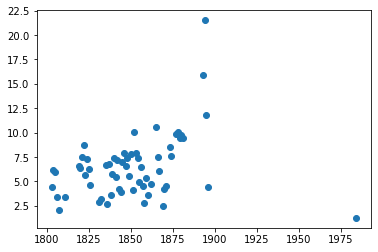

In [10]:
plt.scatter(dfStdDiv.index, dfStdDiv['THERMOMETER'])
plt.show()

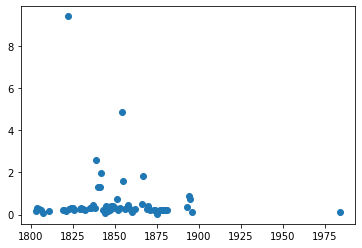

In [11]:
plt.scatter(dfStdDiv.index, dfStdDiv['BAROMETER'])
plt.show()

In [12]:
df.isnull().sum()

YEAR               0
MONTH              0
DAY                0
BAROMETER      22794
THERMOMETER    12878
LATITUDE       84212
LONGITUDE      84060
dtype: int64

In [13]:
df1=df.dropna(how='any').reset_index(drop=True)

In [ ]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Draggable Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Temperture more than .5 quantile</li>
    <li><span style='background:yellow;opacity:0.7;'></span>Temperture less than .5 quantile</li>
    


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

m = folium.Map(tiles="Stamen Toner",
width="%100",
height="%100",
zoom_start=10)
for i in range(len(df1)):
    temp=df1.loc[i]['THERMOMETER']
    year=df1.loc[i]['YEAR']
    month=df1.loc[i]['MONTH']
    day=df1.loc[i]['DAY']
    pop=f"Temperture: \n {temp} <br>"f"Year: \n {year} <br>"f"Month: \n {month} <br>"f"Day: \n {day} <br>"
    if df1.loc[i]['THERMOMETER'] > df1['THERMOMETER'].quantile(.5) :
        color= 'red'
    elif df1.loc[i]['THERMOMETER'] < df1['THERMOMETER'].quantile(.5):
        color='yellow'
    
    folium.Circle(
    radius=50,
    location=[df1.loc[i]['LATITUDE'],df1.loc[i]['LONGITUDE']],
    color=color,
    fill=False,tooltip='Click for more info',
                                 popup=folium.Popup(pop,max_width=200,min_width=200)).add_to(m)
m
macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)  
m

In [ ]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script src="http://unpkg.com/leaflet@1.3.1/dist/leaflet.js"></script>
  <script src="js/leaflet-providers.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Draggable Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Pressure more than .5 quantile</li>
    <li><span style='background:yellow;opacity:0.7;'></span>Pressure less than .5 quantile</li>
    


    
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

m = folium.Map(tiles="Stamen Toner",
width="%100",
height="%100",
zoom_start=10)
for i in range(len(df1)):
    pressure=df1.loc[i]['BAROMETER']
    year=df1.loc[i]['YEAR']
    month=df1.loc[i]['MONTH']
    day=df1.loc[i]['DAY']
    pop=f"Pressure: \n {pressure} <br>"f"Year: \n {year} <br>"f"Month: \n {month} <br>"f"Day: \n {day} <br>"
    if df1.loc[i]['BAROMETER'] > df1['BAROMETER'].quantile(.5) :
        color= 'red'
    elif df1.loc[i]['BAROMETER'] < df1['BAROMETER'].quantile(.5):
        color='yellow'
    
    folium.Circle(
    radius=50,
    location=[df1.loc[i]['LATITUDE'],df1.loc[i]['LONGITUDE']],
    color=color,
    fill=False,tooltip='Click for more info',
                                 popup=folium.Popup(pop,max_width=200,min_width=200)).add_to(m)

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)  
m